In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
# %matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

In [4]:

df = pd.read_csv("1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [7]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [8]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


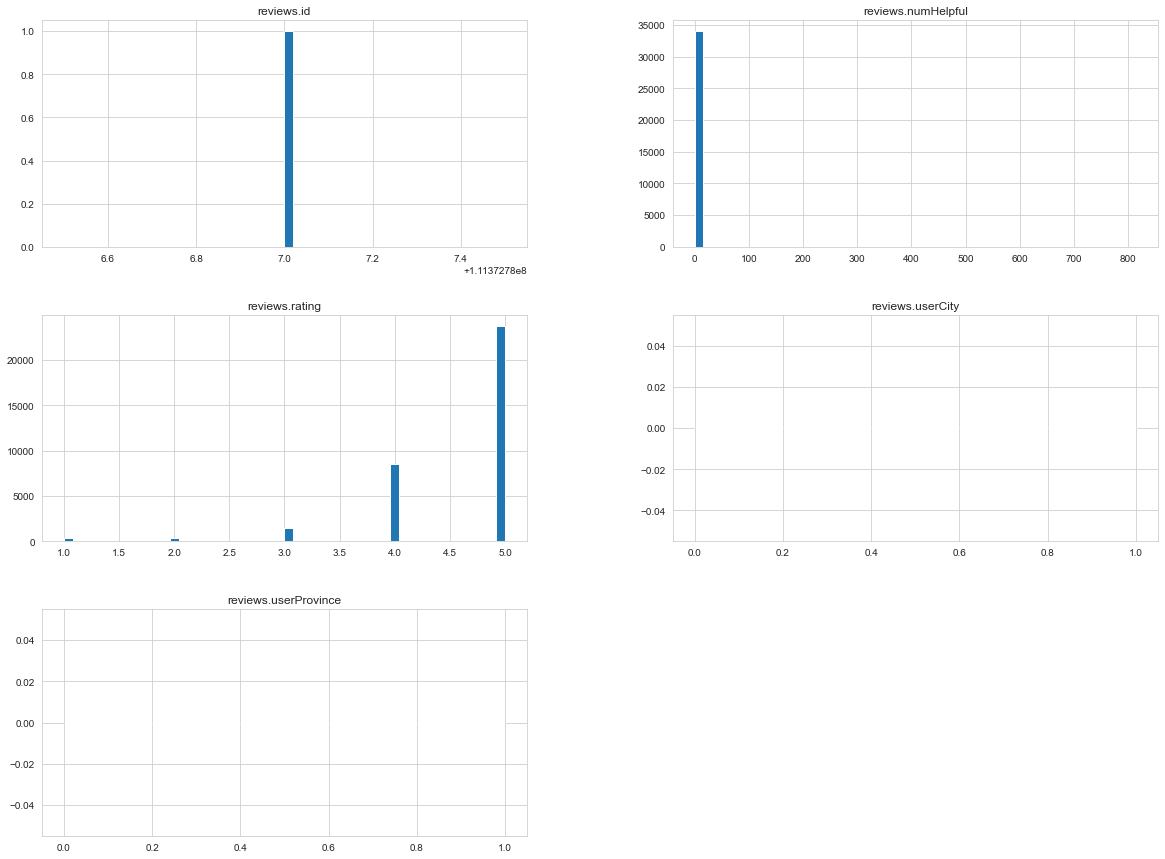

In [9]:
# Builds histogram and set the number of bins and fig size (width, height)
data.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [11]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [12]:
len(strat_train)

27701

In [13]:
strat_train["reviews.rating"].value_counts()/len(strat_train)

5.0    0.685174
4.0    0.247031
3.0    0.043500
2.0    0.011696
1.0    0.011588
Name: reviews.rating, dtype: float64

In [14]:
len(strat_test)

6926

In [15]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.689864
4.0    0.244730
3.0    0.042160
1.0    0.011406
2.0    0.011118
Name: reviews.rating, dtype: float64

In [16]:
reviews = strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
4349,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-28T00:00:00.000Z,2017-05-21T04:06:08Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this for my 11 year old daughter and...,great for all ages,NaN,NaN,Mark
30776,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-06T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:42.763Z,2017-08-19T09:26:46.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"I have the Roku 4, and new Apple TV, this stre...",Great streaming box,NaN,NaN,Techno


In [17]:
len(reviews["name"].unique()), len(reviews["asins"].unique()) 

(47, 35)

In [18]:
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceUR

In [19]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Paperwhite,,,\r\nKindle Paperwhite,,,,...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

In [20]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] == 
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red

In [21]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2318
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2029
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           259
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           106
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

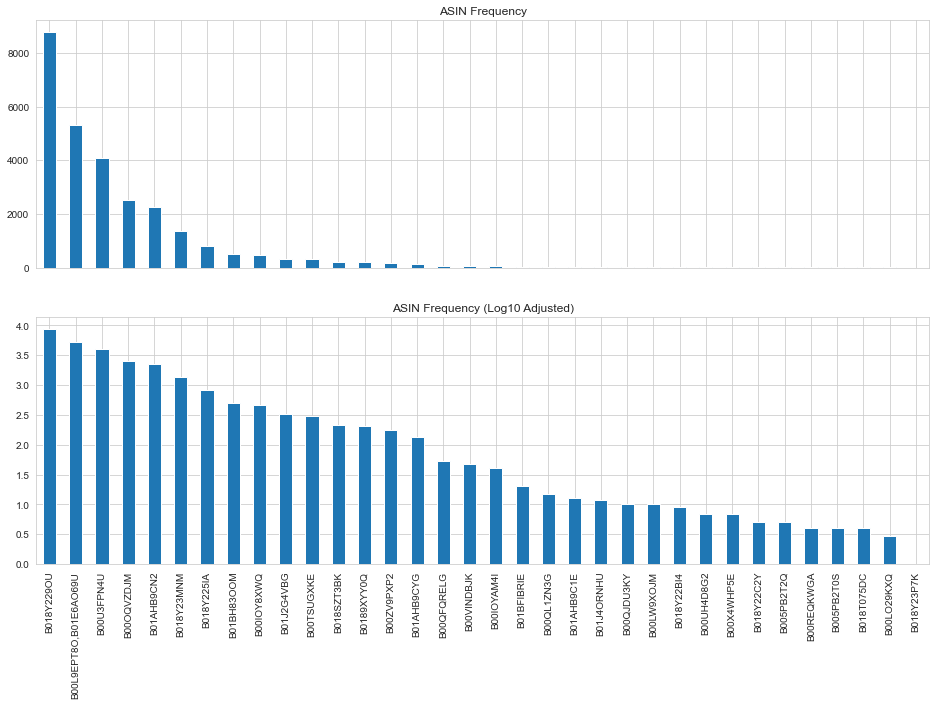

In [22]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [23]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.5841072525566435

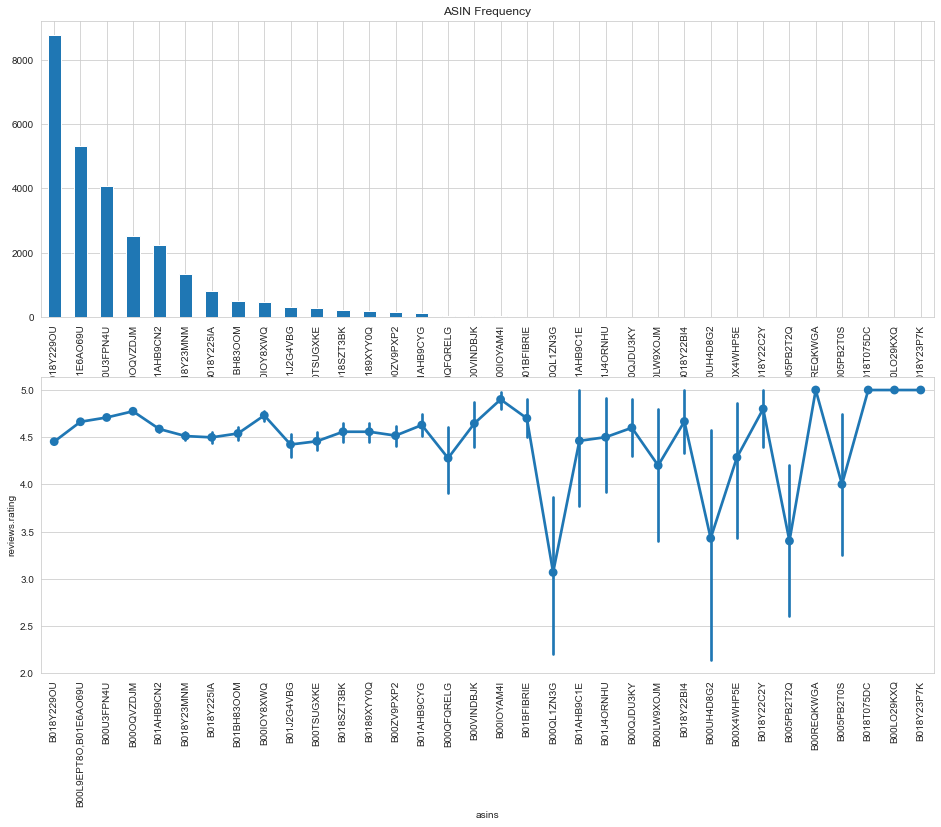

In [24]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

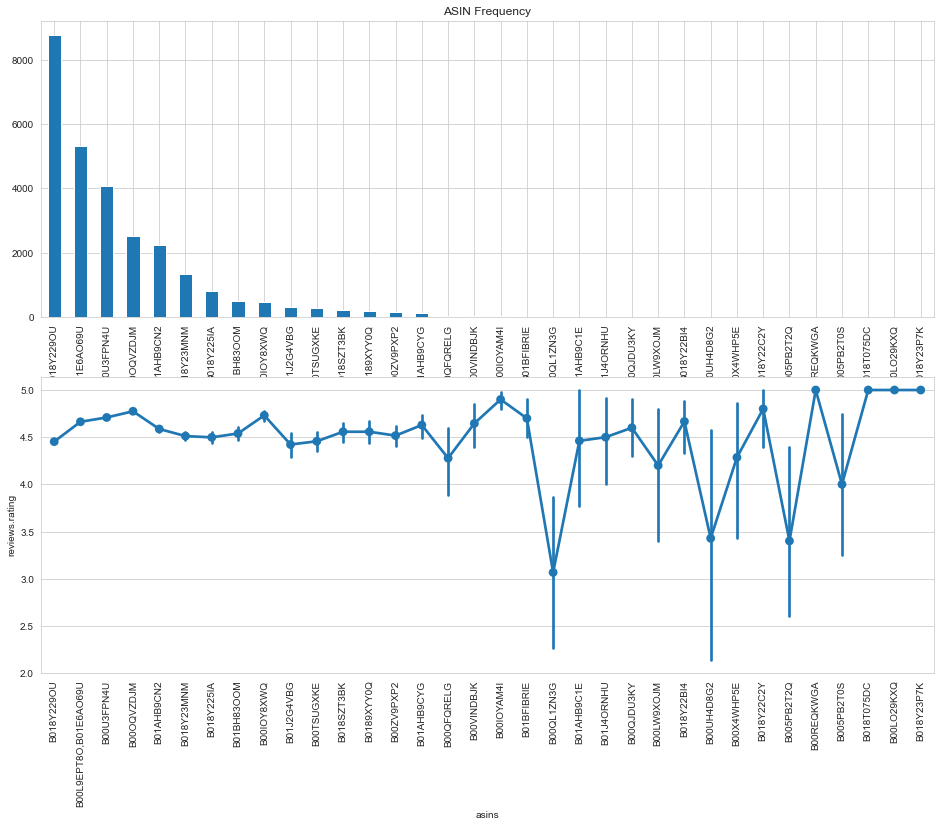

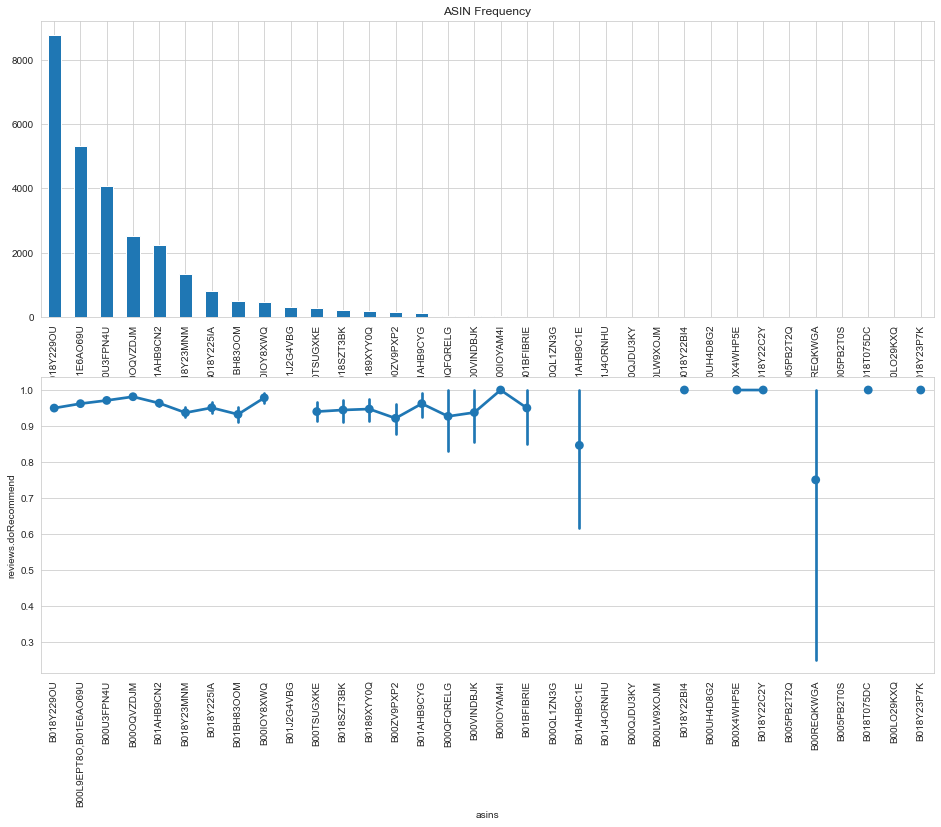

In [25]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()
plt.subplots (2,1,figsize=(16,12))

plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix,data=reviews)
plt.xticks(rotation=90)
plt.show()

In [26]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.00000,-0.04372,NaN,NaN
reviews.rating,NaN,-0.04372,1.00000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceUR

In [28]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8772
"B00L9EPT8O,B01E6AO69U",5304
B00U3FPN4U,4076
B00OQVZDJM,2525
B01AHB9CN2,2241


In [29]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00IOY8XWQ,4.731183
B00IOYAM4I,4.900000
"B00L9EPT8O,B01E6AO69U",4.663462


In [30]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8772,4.453032
"B00L9EPT8O,B01E6AO69U",5304,4.663462
B00U3FPN4U,4076,4.709028
B00OQVZDJM,2525,4.774653
B01AHB9CN2,2241,4.586792
B018Y23MNM,1346,4.511887
B018Y225IA,811,4.498150
B01BH83OOM,504,4.539683
B00IOY8XWQ,465,4.731183
B01J2G4VBG,322,4.422360


,asins,reviews.rating
asins,1.000000,0.099791
reviews.rating,0.099791,1.000000


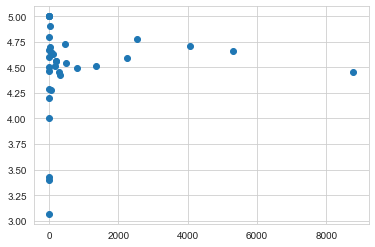

In [31]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

In [32]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

4349     Positive
30776    Positive
28775     Neutral
1136     Positive
17803    Positive
7336     Positive
32638    Positive
13995    Positive
6728     Negative
22009    Positive
11047    Positive
22754    Positive
5578     Positive
11673    Positive
19168    Positive
14903    Positive
30843    Positive
5440     Positive
28940    Positive
31258    Positive
Name: Sentiment, dtype: object

In [33]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


In [34]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12526)

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12526)

In [36]:
# building pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_nominalNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [37]:
# testing model
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9344498989315623

In [38]:
# testing other models
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.937048801617095

In [39]:
# Support Vector Machine Classifier
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9393589373375686

In [40]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.9018192318798729

In [41]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9345942824140918

In [43]:
# target values of test data
X_test_targetSentiment

20609    Positive
14277    Positive
21986    Positive
4401     Positive
8838     Negative
           ...   
2031     Positive
2350     Positive
16698    Positive
3414     Positive
28177    Positive
Name: Sentiment, Length: 6926, dtype: object

In [86]:
# values predicted by our best performing model in form of sentiment ->review of product
i=0
for x in X_test:
    print(predictedLinearSVC[i],":->",x)
    i=i+1

Positive :-> Had a gen 1 Kindle and so glad I moved up to this. Great for outdoor sunny reading. A must have !
Positive :-> I love it. Especially for the price................
Positive :-> Very functional, easy set-up and great so be quality.
Positive :-> Bought this tablet for my daughter so far so good!
Positive :-> We bought the tablet for work, but the only app we needed (free) never would download. After many tries and several hours, we gave up and took it back to the store.
Positive :-> So far this tablet has been efficient. It kinda bad is difficult to use and it seems to require a lot of steps to get the kids profiles set up and it actually does not do everything I hoped it would.
Positive :-> Bought this tablet to replace a digit and one that was on recall. The Amazon ecosystem is nice and the tablet seems to work pretty well. I like the options for limiting screen time especially being able to get nature that reading goals are met FIRST. Unit needs more on board memory howeve

Positive :-> I bought this for my niece for Christmas. I must say it is fast and comes with Amazon underground apps which are all free. Great value!
Positive :-> Purchase this tablet for my brother who is handicapped. Mostly so you can watch videos off of YouTube. Pretty easy for him to understand how to use a tablet. Quality of the screen and speakers are pretty decent. Really good value for how much it costs.
Positive :-> Its a steal at 33.33$. I bought the second version of Kindle fire 3 years ago. And its still running great, even with respect to battery life. I have gifted everyone in my relation. Bought around 10 of them for gifting.
Positive :-> Bought this one for our white kitchen. Blends in well and is very handy both in the morning and at dinner time. New features added weekly.
Positive :-> Excellent. Grandchildren love them. They were so excited to receive this and have not put it down since. Even my 2 year old is having a ball
Positive :-> Speakers sound real low Not easy 

Positive :-> My son is little standoff y Alexa... other then that we like it.
Positive :-> Purchased for my kids but it was hard to navigate and ended up with purchasing an iPad
Positive :-> Perfect gift for friend or family member!!! Very easy to use!
Positive :-> The product was just what I thought it'd be. Worked right out of the box and installation.
Positive :-> Bought this for my 8 year old in place of a Nabi that didn't work out of the package. Great basic tablet for this.
Positive :-> No better tablet for the price. Amazon continues to produce excellent products.
Positive :-> I have a few top end Bluetooth speakers and this Amazon tap rates right up with them in sound and built quality plus it has alexa built in
Positive :-> I love it take a little getting use too.Alexa is very nice she your own personal assistant ask her anything . But first u have to give her skills which are in the app.
Positive :-> This was a gift to an employee and they absolutely love it.
Positive :-> Goo

Positive :-> Great tablet with good parental controls for kids!!
Positive :-> I'm not very electronic savvy but with a little help Alexa is helpful, funny, fun and smart!
Positive :-> Great tablet. Love everything about it. Good selection of apps for free. If you decide to buy apps is also worth it. Cheap prices
Positive :-> Use Echo for so much,music,alarm clock and lights.
Positive :->  
Positive :-> Good Average device for internet content but for 4K forget about it, but if your looking for a simple HD content is good enough.
Positive :-> Very nice display and high resolution! A pleasure to read.
Positive :-> I ordered this and actually came in earlier than predicted and it works beautiful! I'm totally happy with my purchase!!!
Positive :-> Love this amazon echo , answers questions, plays my music , even manages lights in the house ! Love it !
Positive :-> When I first got echo for my wife and I, we really didn't have the highest expectations. It was really something we got to enter

Positive :-> It's my second Kindle but it didn't come with any instructions so it's taking a little while to figure out. The back lighting is great.
Positive :-> The Amazon Echo is their response to Siri in stereo. It has terrific voice recognition and constantly learns new things. The only shortcoming is that it doesn't play nicely with iTunes.
Positive :-> I purchased this thinking it would be a cheaper tablet for my son with great graphics. It is exactly that.
Positive :-> This makes three I have purchased. This time as a gift. Its fun, accurate and works.
Positive :-> The product was easy to setup and use. I really like it.
Positive :-> This device is a good if you are looking for a starter tablet for a young individual.
Positive :-> We truly enjoy our Fire tv. It gives us a wide range of viewing from tv shows to movies
Positive :-> You will very quickly learn how to talk to her in a way that she will understand and it's not unlike speaking to a small frustrating toddler. Alexa, wh

Positive :-> My wife loves it
Positive :-> I purchased these tablets for my grandchildren. They are young and do not need anything fancy. So, knowing these tablets are simple and easy to use for young children was the right one to purchase. They are very happy with the tablets and it is easy for them to understand and use. Excellent purchase.
Positive :-> Great product for a reasonable price. A lot of fun!
Positive :-> Found that this device is extremely convenient, but it often has problems with buffering. They seem to mostly come from outside apps so that's why I am still giving it a 4.
Positive :-> I love my fire i have always wanted one for when I read
Positive :-> I use it primarily for music and also for news, weather, time and entertainment. The only negative I can say is that when I ask it to play music by a specific artist it randomly throws in Christmas music. Christmas music is great in December but it's August.
Positive :-> Our family has made a echo a part of our ordinary 

Positive :-> I got it because a frend that really lime it. I had apple tv and still think is better than this
Positive :-> This was an affordable device that allowed me to play music while at work. It also does quite a bit more, but this was my use of the product. It was less expensive than the iPod.
Positive :-> One of the best purchases i have ever made. It works seamlessly
Positive :-> I am enjoying my Kindle very much! Easy to down load books and easy to read! Very happy with my purchase!
Positive :-> Each of my boys have their own Kindle Fire. They love them! They're easy to use and the micro SD card slot allows you to upgrade the space to add more movies and games. They're especially nice when the wife and I want to enjoy dinner out!
Positive :-> Love the Alexa. She doesn't know as much as Google, but she is still great. I rely on her a lot. Worth every penny.
Positive :-> Grateful I have the hottest item of the year and it works great! Thank you Best Buy!
Positive :-> Loved it s

Positive :-> Grandkids loved the tablets and they seem very durable and long-lasting
Positive :-> My daughter had her 8" Kindle Fire HD stolen earlier this year so when we saw this one on sell over the Thanksgiving holiday it was a no brainier to purchase it since it was $100 cheaper than the Fire we purchased a year ago, granted the Fire HD has a much crispier screen but for my 9 year old daughter, she is now happy just to have a tablet again. And it can do all the things she needs it to do: read books, play games, skype, etc.
Positive :-> Very smooth operating system and easy to use for Netflix, Amazon, Hulu, etc
Positive :-> My kids love itBeats buying a galaxy tab that's double the price and compariable in my opinion.
Positive :-> It was so slow and problematic i couldnt even get in to the store. Switched to a Samsung and we love it!
Positive :-> As a previous several Kindle device owner I read a lot of reviews, many of them put the Voyage above it for various reasons, mainly price

Positive :-> Great device, I did exchange it for a white one. It would work better if I had better internet connection at my house.
Positive :-> Works great as a e reader as well as a tablet. My son loves it.
Positive :-> I bought two of these, one for each of my granddaughters. They absolutely love them.
Positive :-> great for teen agers and easy to use and set up small enough to take as you travel lots off apps to choose from long battery life as well would buy again and would reckomend this to every one even at a great price as well
Positive :-> Perfect for my needs. Really enjoy it, easy to use.
Positive :-> We now own 4 Echos. We have them in our bedrooms and living area. It really is an amazing device. We use it to turn many of our lights on and off, control our outside sprinkler system, wakes us up with alarms, listen to all kinds of music and other information. I also use it to monitor my Amazon purchases and buy things on Amazon that we have purchased before. I understand ther

Positive :-> This tablet is great. I purchased two for children at Christmas and they love it.
Positive :-> I bought this for my 8 year old. I was a great buy. The price was affordable compared to other tablets on the market and e 8" screen is perfect. Another great buy!!!
Positive :-> This is the 3rd echo I now own along w one dot! Have one to my oldest for her dorm and she was really excited. The dot is used w my larger stereo so nonneed for the speaker and extra cost. I did however buy it on sale for $90 on Best Buy and amazon prime day. Amazing deal. Very loud speaker on the echo. Only con is it sometimes is so loud Alexa can't hear your voice to control it. Works with my nest thermostat and eventually with some colored lighting I plan to put in.
Positive :-> As an existing Amazon Prime member, this is a no brainer. Has all the parental controls and kids can have a decent tablet that is durable for use, at a good price.
Positive :-> Better capacity, faster processor overall worth t

Positive :-> I love the fact that this is so much faster than the Amazon stick. Wonderful product.
Positive :-> We ordered 2 of these one for our college daughter and the other our high schooler. They both absolutely love them. I have to admit we steal it every once and awhile. Love it.
Positive :-> Hey it's only a wall charger...Hey it's only a wall charger...Hey it's only a wall charger... Yet to fail, nough said.
Positive :-> The Amazon HD 8 is by far the best budget tablet. If you just need a tablet to browse the web and watch videos this tablet is the way to go! That being said, it is fairly slow but who cares if you do not use the tablet for photo/video editing, gaming, picture taking, etc...
Positive :-> I was first introduced to this product by a friend and ever since I had seen what it is capable of, I not only bought one, but two! I have referred this device to several family members along with friends and they all agreed how impressive it is.
Positive :-> BOUGHT THIS FOR MY 

Positive :-> I've got this as a gift for my grandmother and she's not tech savvy but she can work a kindle. She loves to read and is very pleased with it.
Positive :-> I bought this for Christmas for my niece. She loves it. She's four years old
Positive :-> I upgrade from the fire stick and don't regreted because this one is double the speed and works really good for what I need it.
Positive :-> Great graphics for price compared to other brands.
Positive :-> The tablet is very user friendly for my mom who is not very computer savvy.
Positive :-> Its Really amazing device, i really like it. its working flow less.
Positive :-> Perfect size, great in all lighting situations. Easy to hold, handle and transport. Makes reading even better!
Positive :-> I have really enjoyed using the Amazon Echo so far. It has a great sound.
Positive :-> Nice display, convenient size, lots of apps and books.
Positive :-> Have a nook as my first e-reader. I like downloading library books better on the kindle 

Positive :-> It's 2017 and I was wondering to myself if I should jump on board and get a Kindle paper white. Now and days, people can read ebooks from smartphones to tablets. The thing with me is it caused me eye strain after trying to read my kindle books through my iPad. After much researching and reading the reviews on here, the paper white has been the best purchase decision I've made in order to just sit back and read without causing eye strain. This is only for reading ebooks and is very simple to use. Battery life is amazing and only charge once every two weeks. If you are just looking for a plain ereader, then this gem is your best bet.
Positive :-> We both really enjoy our Echo. There was no problem setting it up. I literally just plugged it in and haven't touched it since. Besides enjoying the music we really like the "Shopping List.". The weather function is great also. As far as it's sound, it has a little too much bass for me. That is the only reason I didn't give it 5 sta

Positive :-> I love this tablet. Easy to use and has a lot of features.
Positive :-> bought this device for my living room tv set up best idea ever
Positive :-> I really like the echo but I am still trying to find out what else it can do for me. I do plan on getting the controllable lights and thermostat down the road but in the mean time it is still limited. Overall great idea.
Positive :-> With Amazon Fire TV, you can access thousands of movies and TV shows instantly. Find favorites quickly or access weather and sports updates using the Alexa voice search...
Positive :-> I bought two Amazon Echo's at their deal of the day price! We love using them. Great service and product!
Positive :-> Kindle fire is excellent device I personally have one as do all of my children at this point
Positive :-> I bought two of these for my granddaughters and they are very easy to use and they love them.
Positive :-> Awesome tablet for young children. They love to play all the videos that it came equippe

IndexError: index 6926 is out of bounds for axis 0 with size 6926